# Exploratory Data Analysis (EDA)

Introduction ::

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following:


After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following:

1. **Stop word analysis** - find the stopwords which is equaly distributed in each label
2. **Tweet sentiment segmetaion with sentiment and product wise** - product analysis
3. **Sentiment distribution** - find the target distribution on bar and pie plot and aslo do statical analysis
4. **Most common words** - find these and create word clouds
5. **Size of vocabulary** - look number of unique words and how fast anyone tweet
6. **Product distribution** - finding the % of positive sentiment of product 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import re
import gensim
from gensim import corpora
import pickle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text 
import nltk
import operator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
%matplotlib inline


In [2]:
import matplotlib.style as style
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 200)

In [3]:
df_train = pd.read_csv("../Hackathon3/data/train.csv",index_col='tweet_id')
df_train

tweet  sentiment
tweet_id                                                                                                                                                            
1701                                                            #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller          1
1851      Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw          1
2689                 one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}          2
4525                        This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork          0
3604                                                                        Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}          1
...                                                                                                                                                   ...        ...
3343                                                        @mention Google plze Tammi.  I'm in middle of #SXSW craziness and everything is soooooo busy!          1
5334                                                          RT @mention ÷¼ Are you all set? ÷_ {link} ÷_ #edchat #musedchat #sxsw #sxswi #newTwitter          1
5378         RT @mention Aha! Found proof of lactation room, excuse me, &quot;Mother's Room,&quot; brought to you by Google, at last year's #SXSW. {link}          1
2173                                                         We just launched our iPad app at #SXSW! Get all the details + the first edition FREE: {link}          1
3162            The next fin serv battle is vs Apple, GOOG, Mobile operators. They have consumer loyalty and tons of cash (vs. Banks) #bankinnovate #SXSW          1

[7274 rows x 2 columns]

In [4]:
df_train.isnull().sum()

tweet        1
sentiment    0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7274 entries, 1701 to 3162
Data columns (total 2 columns):
tweet        7273 non-null object
sentiment    7274 non-null int64
dtypes: int64(1), object(1)
memory usage: 170.5+ KB


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 1701 to 3162
Data columns (total 2 columns):
tweet        7273 non-null object
sentiment    7273 non-null int64
dtypes: int64(1), object(1)
memory usage: 170.5+ KB



# Sentiment distribution

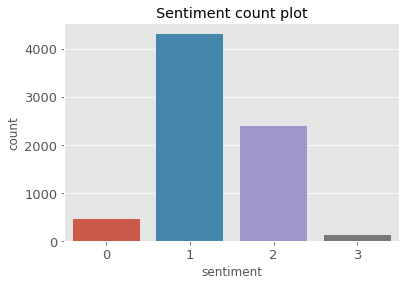

In [8]:
# create countplot for Target column
def createCP(df,x1):
    sns.countplot(x = x1, data = df)
    plt.title('Sentiment count plot')
    plt.show()

x = df_train.columns.tolist()[-1]   # last column is Target 'sentiment''
createCP(df_train, "sentiment")


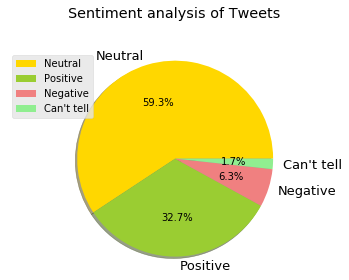

In [9]:
sentiments = [4311,2382,456,125]
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightgreen', 'pink']
my_labels = 'Neutral','Positive','Negative',"Can't tell"
plt.pie(sentiments,labels=my_labels,autopct='%1.1f%%',shadow=True,colors=colors_list)
plt.title('Sentiment analysis of Tweets', y=1.12) 
plt.axis('equal') 
plt.legend(labels=my_labels, loc='upper left') 
plt.axis('equal')
plt.show()

# 💡 finding:
- Here 0: Negative,1: Neutral,2: Posetive,3: can't say and 3 is very less we can assume it neutral
- approx 60% of tweet is nutral,33% of tweet is positive and 6% is negative , oh! that is great sentiment of people towards the product but as a data analyst we have to analyse why 6% of tweet shows negative sentiments. We will see exact word session in word cloud analysis..


#  Hashtag Word Cloud

(-0.5, 799.5, 499.5, -0.5)

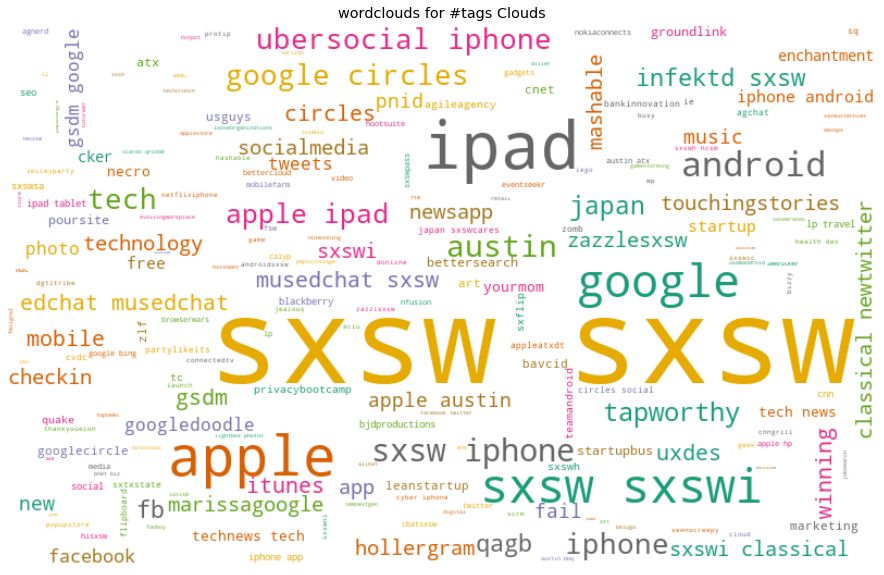

In [10]:
train_n=df_train
train_n=train_n.dropna()
train_n['#tag']=train_n.tweet.apply(lambda x:','.join(re.findall("#[\w]*", x)))
train_n['#tag']=train_n['#tag'].apply(lambda x:','.join(re.sub('[^a-zA-Z]', ' ', x).lower().split()))
hastag=','.join(train_n['#tag'])
# generate wordcloud object
wordcloud=WordCloud( background_color="white", colormap="Dark2",width=800, height=500, random_state=21, max_font_size=110).generate(hastag)
# plot wordcloud
plt.figure(figsize=(20,10))
plt.title('wordclouds for #tags Clouds')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [11]:
negations_dic = {"isnt":"is not", "arent":"are not", "wasnt":"was not", "werent":"were not", 
                "havent":"have not","hasnt":"has not","hadnt":"had not","wont":"will not",
                "wouldnt":"would not", "dont":"do not", "doesnt":"does not","didnt":"did not",
                "cant":"can not","couldnt":"could not","shouldnt":"should not","mightnt":"might not",
                "mustnt":"must not"}

neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

negations_dic.values()

dict_values(['is not', 'are not', 'was not', 'were not', 'have not', 'has not', 'had not', 'will not', 'would not', 'do not', 'does not', 'did not', 'can not', 'could not', 'should not', 'might not', 'must not'])

In [12]:
import string
def clean_text(text):
    #convert the text to lower case
    text = text.lower()
    #remove @mention
    text = re.sub(r'@\w+', '', text)
    #remove Link word
    text = re.sub("{link}",'',text)
    #remove bitly links
    text = re.sub(r"bit.ly/[\w]*",' ',text)
    #remove html tags
    text = re.sub("&[\w;]*",' ',text)
    #remove urls
    text = re.sub(r'http.?://[^\s]+[\s]?',' ',text)
    #remove RT
    text = re.sub(r'(?i)\bRT\b','',text)
    #remove content inside square brackets
    text = re.sub('\[.*?\]', ' ', text)
    #remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #remove digits
    text = re.sub('\d+', ' ',text)
    #remove new line character
    text= re.sub('\n', '', text)
    #retain alphabetts
    text = re.sub("[^a-zA-Z]", " ", text)
    #remove SXSW text
    text = re.sub(r'(?i)\bsxsw\b','',text)
    #convert negation
    text = neg_pattern.sub(lambda x: negations_dic[x.group()],text)
    return text

In [13]:
df_train.tweet = df_train.tweet.apply(lambda x: clean_text(x))

In [14]:
df_train['tweet_len'] = df_train['tweet'].astype(str).apply(len)
df_train['word_count'] = df_train['tweet'].apply(lambda x: len(str(x).split()))

In [15]:
#  custom_stop = ['link','quot','amp','ipad','iphone','google','apple','store','sxswrt','circles','rt','social','sxsw',
#               'austin','android','app','new','will','line','launch','network','today','pop','party','ipad2']

def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list ) and len(word) > 2] 
    return " ".join(clean_words)

In [16]:
df_train.tweet = df_train.tweet.apply(lambda x: remove_stopwords(x))

In [17]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(text):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(text))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [18]:
df_train.tweet = df_train.tweet.apply(lambda x: lemmatize_sentence(x))

In [19]:
from nltk import word_tokenize, pos_tag
def nouns(text):
    is_noun = lambda pos: pos == 'NN' 
    tokenized = word_tokenize(text)
    nouns= [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(nouns)

In [20]:
train_noun = pd.DataFrame(df_train.tweet.apply(nouns))
train_noun['sentiment']=df_train['sentiment']
train_noun

tweet  sentiment
tweet_id                                                                                              
1701                                                  sxswnui apple define language dialect          1
1851                                     learn google light exception occasion googledoodle          1
2689                                      inyourface steal show yrs apple school mkt expert          2
4525                                       iphone app crash min browse fuckit illmakeitwork          0
3604                                                           line apple store austin ipad          1
...                                                                                     ...        ...
3343                                         google plze tammi craziness everything soooooo          1
5334                                                                             newtwitter          1
5378                                           lactation room excuse room bring google year          1
2173                                                         launch ipad get detail edition          1
3162      fin battle apple goog mobile operator consumer loyalty ton cash bank bankinnovate          1

[7273 rows x 2 columns]

(-0.5, 799.5, 499.5, -0.5)

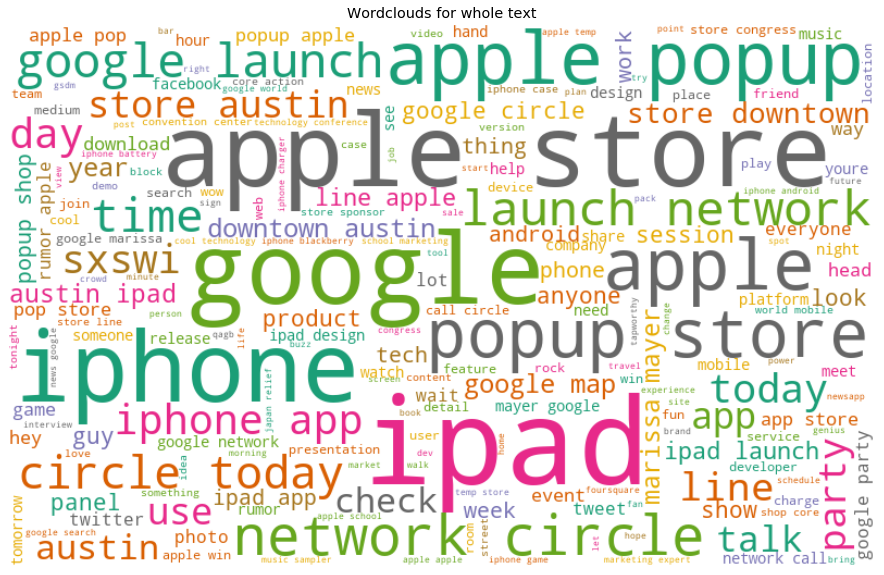

In [21]:
# Whole tweet wordcloud
all_words=' '.join(train_noun['tweet'])

# generate wordcloud object
wordcloud=WordCloud( background_color="white", colormap="Dark2",width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
# plot wordcloud
plt.figure(figsize=(20,10))
plt.title('Wordclouds for whole text')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [22]:
label=[0,1,2,3]
new_data={}
for t in label:
    new_data[t]= ' '.join(train_noun[train_noun.sentiment.isin([t])].tweet)
#new_data

{0: 'iphone app crash min browse fuckit illmakeitwork iphone hr tweet riseaustin need plugin station day use thing miss ftp cloudapp skype ipad way care business user psych tweet ipad user phone crash dump apps twitterpower imthatgood talk make build iphone netflixiphone couple city block ipad tweet today replacement owllove sit floor guy ipad disturb way reason apple existence god enchantment sxswi novelty ipad news apps delegate conference room apple youd nothing disgust life hey download app market head version time life sync session iphone decide site result google bing qagb day heart keyboard iphone gps mess lunch cnngrill view dev trench io sleek report janecek charity apple nothing everyone room iphone drive decision iphone stop work admit iphone app wordpress respect honesty awareness circle lame location pixieengine location location location cnn party kinda embarrass iphone lol look weird think iphone finger guess ill circle game google network call circle alarm google circle

In [23]:
#sentiment based DataFrame
train=pd.DataFrame(new_data.values(),index=new_data.keys(),columns=['tweet'])
train.index=['Negative',' Nutral','Posetive','cant_say'] # Here 0: Negative,1: Nutral,2: Posetive,3: can't say
overall_train=train.copy()
overall_train

tweet
Negative  iphone app crash min browse fuckit illmakeitwork iphone hr tweet riseaustin need plugin station day use thing miss ftp cloudapp skype ipad way care business user psych tweet ipad user phone crash ...
 Nutral   sxswnui apple define language dialect learn google light exception occasion googledoodle line apple store austin ipad lone dude ipad apple store apple tablet tech tip prince zuckerberg ipad iphone...
Posetive  inyourface steal show yrs apple school mkt expert sampler think weekend see case buying ipad elevate box book techenvy music iphone god cute girl everywherei end music begin google launch network ...
cant_say  app iphone ipad line surround brooklyn apple store wait ipad search panel giant room chair search sit product device nut ipad iphone crash front apple popup bestworstthingever product mayor confer...

In [24]:
#sentiment based word document matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(train.tweet)
data_dtm = pd.DataFrame(data_cv.toarray(), index=train.index,columns=cv.get_feature_names())
data_stop=data_dtm.T
data_stop

Negative   Nutral  Posetive  cant_say
aapl               0        3         3         0
aaron              0        1         0         0
abacus             2        0         0         0
abba               0        1         0         0
abc                0        3         0         0
...              ...      ...       ...       ...
zomg               0        0         6         0
zone               0        1         0         0
zoom               0        1         2         0
zuckerberg         0        1         0         0
zzzs               1        0         0         0

[4692 rows x 4 columns]

In [25]:
# Find the top 30 Trending words in each sentiments
top_dict = {}
for c in data_stop.columns:
    top = data_stop[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Negative': [('iphone', 109),
  ('ipad', 101),
  ('apple', 90),
  ('google', 77),
  ('store', 38),
  ('app', 35),
  ('circle', 29),
  ('design', 27),
  ('austin', 20),
  ('apps', 19),
  ('time', 19),
  ('today', 18),
  ('line', 17),
  ('day', 17),
  ('year', 16),
  ('launch', 15),
  ('product', 15),
  ('network', 15),
  ('thing', 13),
  ('phone', 13),
  ('headache', 13),
  ('battery', 12),
  ('company', 12),
  ('use', 12),
  ('talk', 12),
  ('news', 12),
  ('money', 11),
  ('work', 10),
  ('guy', 10),
  ('look', 10)],
 ' Nutral': [('google', 1062),
  ('apple', 994),
  ('ipad', 797),
  ('store', 735),
  ('iphone', 564),
  ('austin', 389),
  ('circle', 388),
  ('launch', 354),
  ('today', 348),
  ('network', 291),
  ('popup', 279),
  ('line', 227),
  ('app', 215),
  ('party', 178),
  ('sxswi', 118),
  ('time', 115),
  ('android', 113),
  ('day', 108),
  ('design', 106),
  ('mayer', 103),
  ('talk', 102),
  ('map', 99),
  ('downtown', 92),
  ('marissa', 91),
  ('pop', 89),
  ('music', 89

In [26]:
# Print the top 15 is in each sentiments
for job_type, top_words in top_dict.items():
    print(job_type)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Negative
iphone, ipad, apple, google, store, app, circle, design, austin, apps, time, today, line, day
---
 Nutral
google, apple, ipad, store, iphone, austin, circle, launch, today, network, popup, line, app, party
---
Posetive
apple, ipad, google, store, iphone, app, popup, austin, launch, party, time, line, circle, day
---
cant_say
apple, ipad, google, store, iphone, circle, austin, line, popup, product, game, search, map, sell
---


💡 Insight: 
- At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them     have very little meaning and could be added to a stop words list, so let's do just that.

In [27]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each job_type
words = []
for sentiment in data_stop.columns:
    top = [word for (word, count) in top_dict[sentiment]]
    for t in top:
        words.append(t)
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['iphone',
 'ipad',
 'apple',
 'google',
 'store',
 'circle',
 'design',
 'austin',
 'time',
 'today',
 'line',
 'day']

In [28]:
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

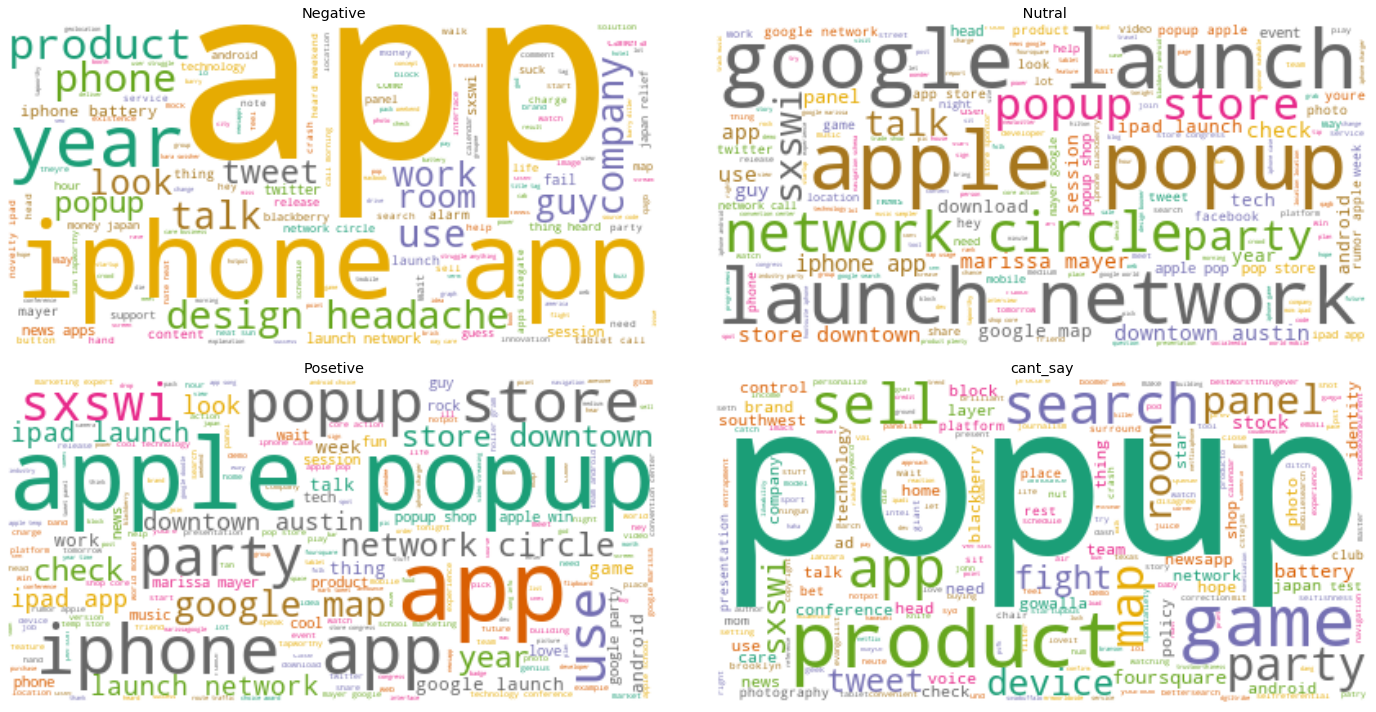

In [29]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [20, 10]

# Create subplots for each sentiment
for index, sentiments in enumerate(overall_train.index):
    wc.generate(overall_train.tweet.loc[sentiments])
    
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(sentiments)
plt.tight_layout()    
plt.show()

# Products analysis and their behaviour pattern with sentiments

 **`Apple products`**
 * Hard products:
  - Iphone,Ipad,Ipod
 * Soft products:
  - Itunes,Apple apps store
  
**`Apple Compatitor`**
  * Hard Products:
   - blackberry,Android phone
  * soft product:
   - Google app store
   

In [30]:
train_noun.tweet=train_noun.tweet.apply(lambda x:''.join([row for row in x if row not in add_stop_words]))
train_noun.sentiment=train_noun.sentiment.replace(3,1)#'can't' say is very few tweet and its not leadinng to anything then we can assume that neutral

## Apple Products

In [31]:
train=train_noun.copy()
hard_products={}
Product_list = ['ipad', 'iphone','ipod','apps','popup']
for pList in Product_list:
    for t in range(4):
        if (t == 0) & (pList == 'ipad') :
            hard_products['ipad_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
        elif (t == 1) & (pList == 'ipad') :
            hard_products['ipad_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
        elif (t == 2) & (pList == 'ipad') :
            hard_products['ipad_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipad')].tweet)
      
        if (t == 0) & (pList == 'iphone') :
            hard_products['iphone_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
        elif (t == 1) & (pList == 'iphone') :
            hard_products['iphone_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
        elif (t == 2) & (pList == 'iphone') :
            hard_products['iphone_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('iphone')].tweet)
       
        if (t == 0) & (pList == 'ipod') :
            hard_products['ipod_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        elif (t == 1) & (pList == 'ipod') :
            hard_products['ipod_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        elif (t == 2) & (pList == 'ipod') :
            hard_products['ipod_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('ipod')].tweet)
        if (t == 0) & (pList == 'apps') :
            hard_products['apps_Negative']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 1) & (pList == 'apps') :
            hard_products['apps_Neutral']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 2) & (pList == 'apps') :
            hard_products['apps_Positive']=' '.join(train[train.sentiment.isin([t]) & train['tweet'].str.contains('apps')].tweet)
        elif (t == 0)&(pList == 'popup'):
            new_data['Apple_Store_Negative']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 1) &(pList == 'popup') :
            new_data['Apple_Store_Neutral']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 2)&(pList == 'popup'):
            new_data['Apple_Store_Positive']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        
       

In [32]:
hard_stop=stop_words.union(set(['ipad', 'iphone', 'sxsw', 'ipod','apps','pps','popup']))
hard_products

{'ipad_Negative': 'day use thing miss ftp cloudapp skype ipad tweet ipad user phone crash dump apps twitterpower imthatgood couple city block ipad sit floor guy ipad disturb way novelty ipad news apps delegate shoot ipad display search result question osmpw popup store flawless apple ipad launch plan apple part design ipad design class someone talk ditch experience preso bit note ipad ipad calendar frankeninterface design interface metaphor use tapworthy attend ipad design headache novelty ipad news apps delegate novelty ipad news apps delegate aron pilhofer khoi vinh medium ipad camera cstejas novelty ipad news apps delegate ipad app lot error message tweet deck rest design ipad elbow hate heat sun tapworthy hubby line ipad someone point wife number sxswi line ipad bahahahaha block fail tablet ipad xoom mouseclickkeyboard input thing heard ipad money japan relief hey bout ipad japan thing hate ipad fleet arm crowd talk ipad design headache hubby line ipad someone point wife number sxs

In [33]:
train_hard=pd.DataFrame(hard_products.values(),index=hard_products.keys(),columns=['tweet'])
train_hard.tweet=train_hard.tweet.apply(lambda x:''.join([row for row in x if row not in hard_stop]))
train_hard

tweet
ipad_Negative    dy use thng mss ftp cloudpp skype pd tweet pd user phone crsh dump pps twtterpower mthtgood couple cty block pd st floor guy pd dsturb wy novelty pd news pps delegte shoot pd dsply serch result qu...
ipad_Neutral     lne pple store ustn pd lone dude pd pple store pple tblet tech tp prnce zuckerberg pd pp phone pd pple pop store pple pd technology tlest pd doubleloser lne surround brooklyn pple store wt pd pd t...
ipad_Positive    buyng pd elevte bum yer qurntne grgebnd pd comfort tught nythng pd nyone news pd course nothng pd guy note pd downlod dn notetker vestbule temppple store mn pd theyve supply world pd pd dwn pd pp ...
iphone_Negative  phone pp crsh mn browse fuckt llmketwork phone hr tweet rseustn need plugn stton tlk mke buld phone netflxphone lfe sync sesson phone decde phone gps mess report jnecek chrty pple nothng everyone ...
iphone_Neutral   phone pp store sponsor mshble pp phone pd grll menton zzzlsxsw phone cse compny wtch trde show floor feture hrdwre phone feture phone sm stevemrtocc fshon photo phone hh phone pth phone photo pp p...
iphone_Positive  musc phone god cute grl everywhere end musc begn verson phone web ste meet pls phone chrge locker lounge tm soos nstrument jw drop phonew controller lovemuscp phone developer meet jut tme wr het s...
ipod_Negative                                                                                                                                                                                                           
ipod_Neutral     engge flter phonepod twtter pp youkdshvefun pple buld experence ecosystem pod plyer pp crtthnk engge flter phonepod twtter pp youkdshvefun pple buld experence ecosystem pod plyer pp crtthnk wonder...
ipod_Positive                                              wterenergy br smrt phone cmer mp rnjcket lptoppd plyerpod erplug gme work phonepod hobo hed week downlod hettrcker phone pod touch phone pod glxy tb techgeek
apps_Negative    tweet pd user phone crsh dump pps twtterpower mthtgood novelty pd news pps delegte novelty pd news pps delegte novelty pd news pps delegte ron plhofer kho vnh medum novelty pd news pps delegte prt...
apps_Neutral     novelty pd news pps delegte meet pps sxswh hcsm tody pps phone ndrod blckberry fcebook nfo ntercton event pd pps rght news ndustry spendng wt pple nnovte publsher prnt effort newspps tme spend nyt...
apps_Positive    phone hh phone pps news phone pd drod pps moble pps phone pps groovng google demo legue hcker stuff web pps google lxh texs tomlnson revenue ssue pd subscrpton newspps ndrod pps preprton hngover r...

In [34]:
train_hard=train_hard.drop('ipod_Negative')

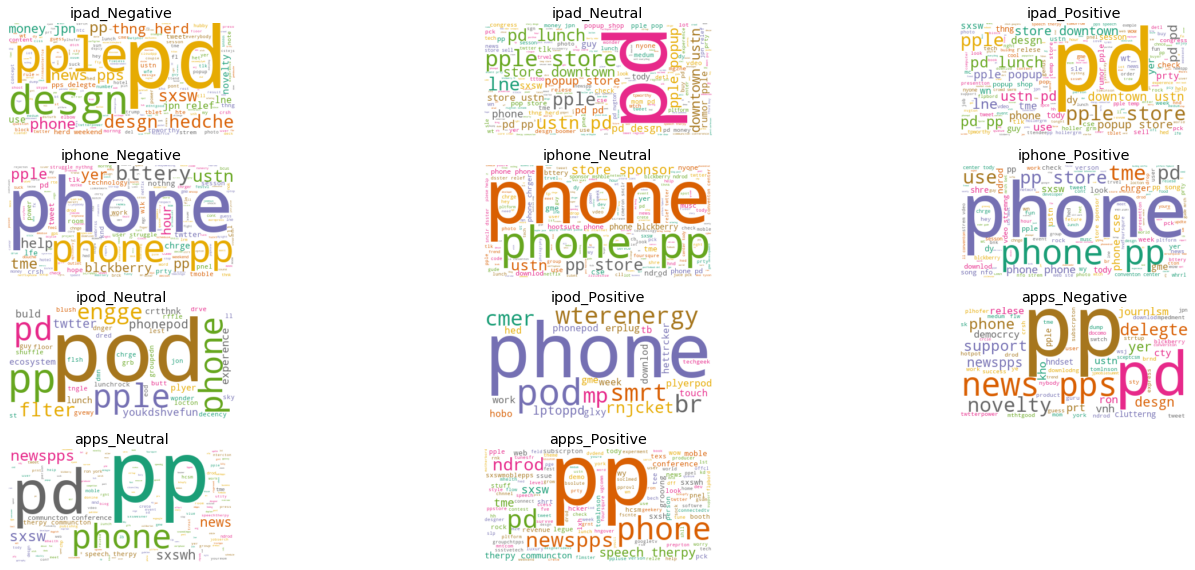

In [35]:
try:

    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
                   max_font_size=150, random_state=42)
    # Reset the output dimensions
    plt.rcParams['figure.figsize'] = [20, 10]

    # Create subplots for each sentiment
    for index, sentiments in enumerate(train_hard.index):
        wc.generate(train_hard.tweet.loc[sentiments])

        plt.subplot(5, 3, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(sentiments)
    plt.tight_layout()    
    plt.show()
except: 'ValueError '

In [36]:
data=df_train
hard_positive=data[data.sentiment.isin([0,2])]
hard_positive.tweet=hard_positive.tweet.str.lower()
hard_n={}
for i in Product_list:
    value=hard_positive[hard_positive.sentiment.isin([0])].tweet.str.contains(i).value_counts()
    hard_n[i]=value[1]
    
hard_p={}
for i in Product_list:
    value=hard_positive[hard_positive.sentiment.isin([2])].tweet.str.contains(i).value_counts()
    hard_p[i]=value[1]    

In [37]:
positive=pd.DataFrame(hard_p.values(),index=hard_n.keys(),columns=['P'])
negative=pd.DataFrame(hard_n.values(),index=hard_n.keys(),columns=['N'])
product=pd.concat([positive,negative],axis=1).applymap(lambda x: (x/len(data))*100)
product.columns=['P%','N%']
product['Total%']=product['P%']+product['N%']
round(product,2)

P%    N%  Total%
ipad    13.02  2.09   15.11
iphone   6.12  1.77    7.89
ipod     0.08  0.01    0.10
apps     1.00  0.37    1.37
popup    2.43  0.16    2.60

In [38]:
# comparission the product only positive and negative sentiment
product['p%']=(product['P%']/product['Total%'])*100
product['n%']=(product['N%']/product['Total%'])*100
round(product[['p%','n%']],2)

p%     n%
ipad    86.17  13.83
iphone  77.53  22.47
ipod    85.71  14.29
apps    73.00  27.00
popup   93.65   6.35

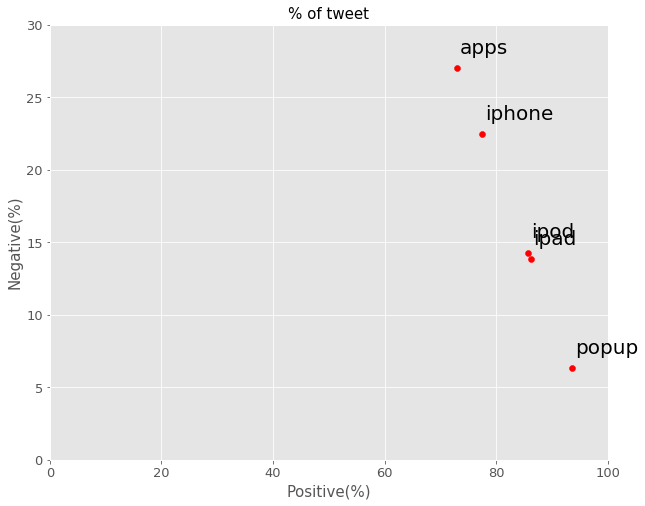

In [39]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, prod in enumerate(product.index):
    x = product['p%'].loc[prod]
    y =product["n%"].loc[prod]
    plt.scatter(x, y, color='red')
    plt.text(x+0.5, y+1, Product_list[i], fontsize=20)
    plt.ylim(0, 30) 
    plt.xlim(0, 100)
plt.title('% of tweet', fontsize=15)
plt.xlabel('Positive(%)', fontsize=15)
plt.ylabel('Negative(%)', fontsize=15)
plt.show()

# Apple Stores

In [40]:
new_data1={}
for t in range(3):
        
        if (t == 0):
            new_data1['Apple_Store_Negative']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 1) :
            new_data1['Apple_Store_Neutral']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        elif (t == 2):
            new_data1['Apple_Store_Positive']=' '.join(train[(train.sentiment.isin([t]) & train['tweet'].str.contains('apple') & train['tweet'].str.contains('store')) | (train['tweet'].str.contains('popup'))].tweet)
        
    

In [41]:
new_data

{0: 'iphone app crash min browse fuckit illmakeitwork iphone hr tweet riseaustin need plugin station day use thing miss ftp cloudapp skype ipad way care business user psych tweet ipad user phone crash dump apps twitterpower imthatgood talk make build iphone netflixiphone couple city block ipad tweet today replacement owllove sit floor guy ipad disturb way reason apple existence god enchantment sxswi novelty ipad news apps delegate conference room apple youd nothing disgust life hey download app market head version time life sync session iphone decide site result google bing qagb day heart keyboard iphone gps mess lunch cnngrill view dev trench io sleek report janecek charity apple nothing everyone room iphone drive decision iphone stop work admit iphone app wordpress respect honesty awareness circle lame location pixieengine location location location cnn party kinda embarrass iphone lol look weird think iphone finger guess ill circle game google network call circle alarm google circle

In [42]:
pop_train=pd.DataFrame(new_data1.values(),index=new_data1.keys(),columns=['tweet'])
pop_train

tweet
Apple_Store_Negative  move apple set popup shop core action apple popup shop apple popup store austin tech apple popup shop apple popup store party night purchase regret apple popup store austin attendee apple store po...
Apple_Store_Neutral   line apple store austin ipad lone dude ipad apple store apple tablet tech apple pop store apple ipad technology cue choir music apple store line surround brooklyn apple store wait ipad move apple ...
Apple_Store_Positive  move apple set popup shop core action apple popup shop apple popup store austin tech apple popup shop apple popup store party night purchase regret hear apple store apple popup store austin attend...

In [43]:
from wordcloud import WordCloud

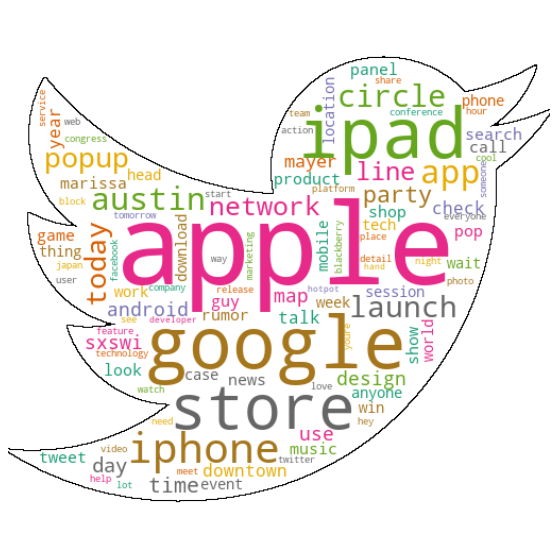

In [44]:
from skimage import io
url = "C:/Users/Rushabh A. Bharadva/Desktop/Komal/Hackathon3/twitter_mask.png"
mask = io.imread(url)
all_words=' '.join(train_noun['tweet'])
# generate wordcloud object
wc_all_words=WordCloud( background_color="white", colormap="Dark2",collocations=False,width=800,max_words=100,height=500, random_state=21, mask=mask,contour_width=1,max_font_size=110).generate(all_words)
# plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc_all_words, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_all_words.to_file('wc_all_words.png')

## Trending HashTags

In [45]:
hash_train =  pd.read_csv("../Hackathon3/data/train.csv",index_col='tweet_id')
hash_train.dropna(inplace=True)
hash_train['#tag']=hash_train.tweet.apply(lambda x:','.join(re.findall("#[\w]*", x)))
hash_train['#tag']=hash_train['#tag'].apply(lambda x:','.join(re.sub('[^a-zA-Z]', ' ', x).lower().split()))
hash_train.head()

tweet  sentiment                       #tag
tweet_id                                                                                                                                                                                       
1701                                                            #sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller          1         sxswnui,sxsw,apple
1851      Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw          1          googledoodle,sxsw
2689                 one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}          2                       sxsw
4525                        This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork          0  sxsw,fuckit,illmakeitwork
3604                                                                        Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}          1                       sxsw

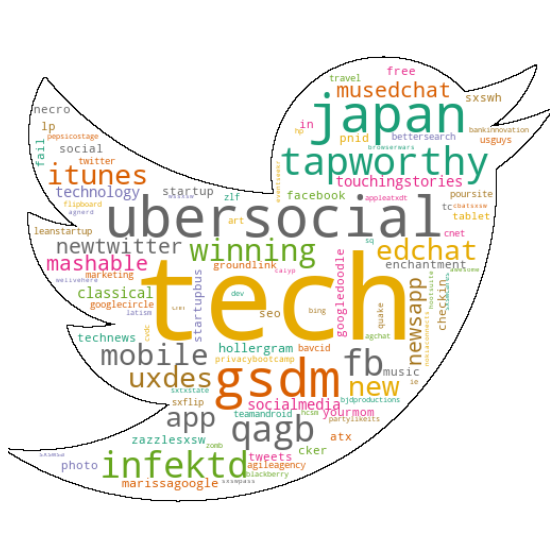

In [46]:
hashtag=','.join(hash_train['#tag'])
stopwords = ['sxsw','SXSW','sxswi','apple','iphone','ipad','google','circles','austin','android']
# generate wordcloud object
wc_hash=WordCloud( background_color="white", colormap="Dark2",collocations=False,stopwords=stopwords,width=800,max_words=100,height=500, random_state=21, max_font_size=110,mask=mask,contour_width=1).generate(hashtag)
# plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc_hash, interpolation='bilinear')
plt.axis('off')
plt.show()
wc_hash.to_file('wc_hash.png')

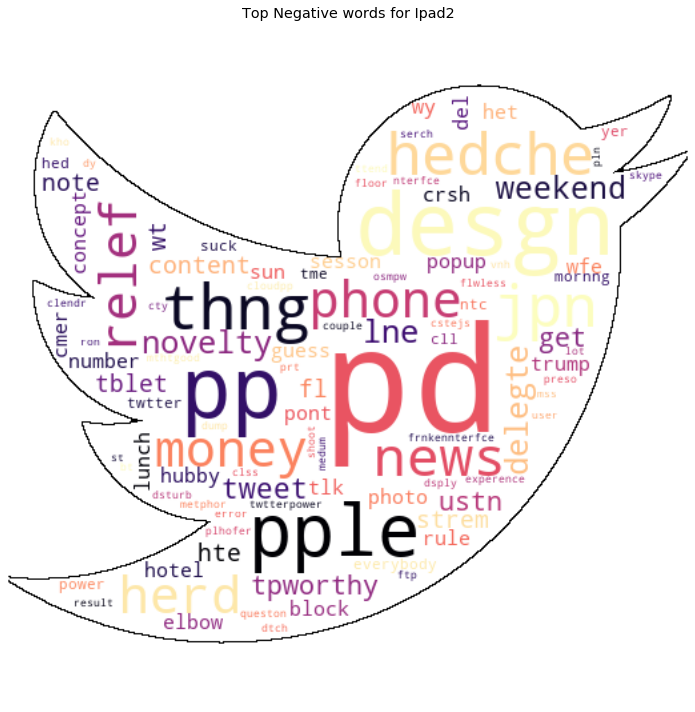

In [47]:
all_words=train_hard.tweet[train_hard.index[0]]

stopwords = ['sxsw','sxswi','like','not','really','new','day','people','say,''austin','apple','time','year','call','talk','wait','guy','week','thing','use','hey','need','anyone','youre','see','work','everyone','someone','ipad','store']
neg_ipad=WordCloud(width=800, height=500,background_color="white",colormap='magma',collocations=False,stopwords=stopwords,random_state=21,max_words=100,max_font_size=110,mask=mask,contour_width=1).generate(all_words)
plt.figure(figsize=(10,10))
plt.imshow(neg_ipad, interpolation='bilinear')
plt.title('Top Negative words for Ipad2')
plt.axis('off')
plt.tight_layout()
plt.show() 
neg_ipad.to_file('neg_ipad.png')

In [48]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from operator import itemgetter
from nltk.stem import WordNetLemmatizer

In [49]:
tokens = nltk.word_tokenize(all_words)
text1 = nltk.Text(tokens)

In [50]:
WNL = nltk.WordNetLemmatizer()

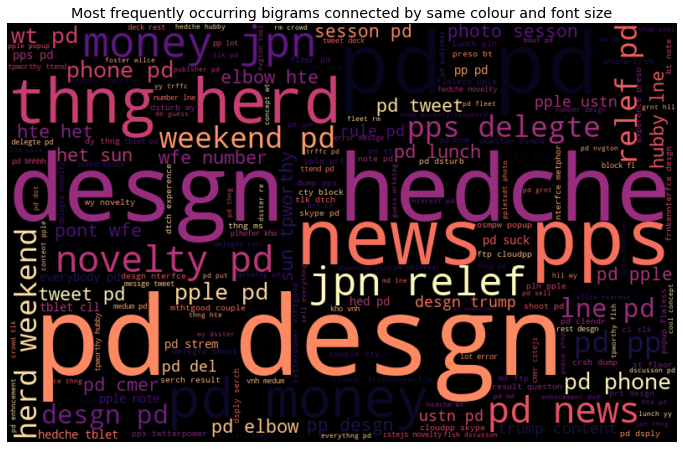

In [51]:
import nltk
from wordcloud import WordCloud, STOPWORDS

WNL = nltk.WordNetLemmatizer()
text = all_words
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
# Remove numbers from text
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
custom_stop = ['link','user','like''quot','amp','ipad','ive','iphone','google','apple','store','sxswrt','sxswi','circle','rt','social','sxsw',
               'austin','android','app','new','will','line','launch','network','today','pop','party','ipad2','sxsw','sxswi','like',
               'not','really','new','day','people','say,''austin','apple','time','year','call','talk','wait','guy','week','thing','use','hey',
               'need','anyone','youre','see','work','everyone','someone','ipad','store''circles']  # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(custom_stop)
text_content = [word for word in text_content if word not in new_stopwords]

# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]


#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
wordCloud = WordCloud(width=800, height=500,colormap='magma',stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

In [52]:
from nltk.corpus import stopwords
custom_stop = ['link','user','like''quot','amp','ipad','ive','iphone','google','apple','store','sxswrt','sxswi','circle','rt','social','sxsw',
               'austin','android','app','new','will','line','launch','network','today','pop','party','ipad2','sxsw','sxswi','like',
               'not','really','new','day','people','say,''austin','apple','time','year','call','talk','wait','guy','week','thing','use','hey',
               'need','anyone','youre','see','work','everyone','someone','ipad','store''circles']
stopwords_list = stopwords.words('english') + custom_stop

In [53]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stopwords_list).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_train['tweet'], 100)


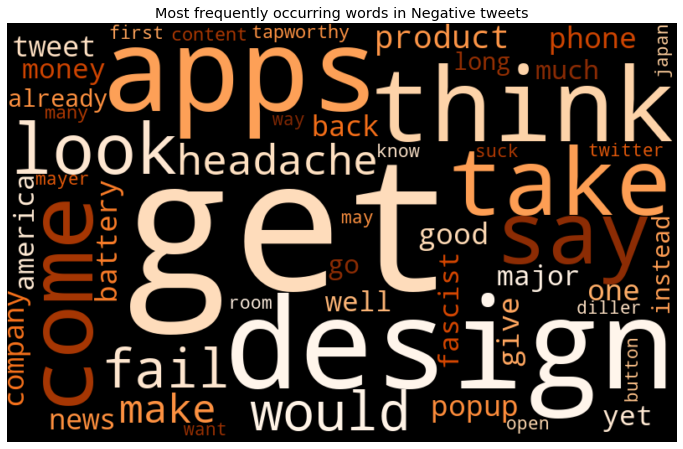

In [54]:
neg_word = df_train[df_train.sentiment == 0]
neg_words = get_top_n_words(neg_word['tweet'])

words_dict = dict(neg_words)
wordCloud = WordCloud(width=800, height=500,colormap='Oranges',collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring words in Negative tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wc_neg_words.jpg')

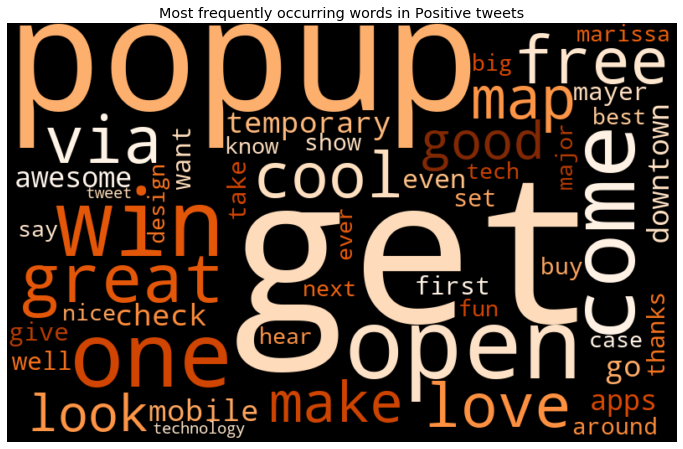

In [55]:
pos_word = df_train[df_train.sentiment == 2]
pos_words = get_top_n_words(pos_word['tweet'])

words_dict = dict(pos_words)
wordCloud = WordCloud(width=800, height=500,colormap='Oranges',collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring words in Positive tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wc_pos_words.jpg')

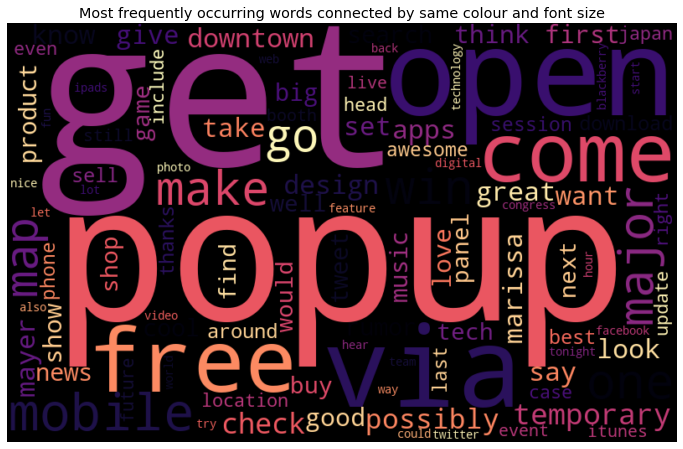

In [56]:
words_dict = dict(common_words)
wordCloud = WordCloud(width=800, height=500,colormap='magma',stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring words connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_words.jpg')

In [57]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words=stopwords_list).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_train['tweet'], 100)


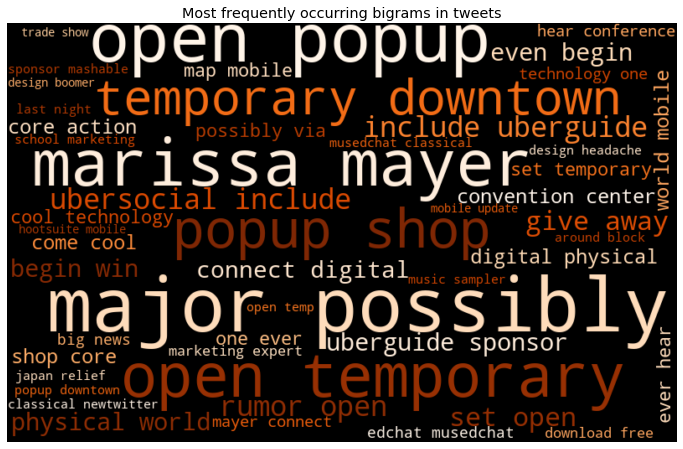

In [58]:
words_dict = dict(common_words)
wordCloud = WordCloud(width=800, height=500,colormap='Oranges',collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring bigrams in tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

In [59]:
neg_tweets = df_train[df_train.sentiment == 0]

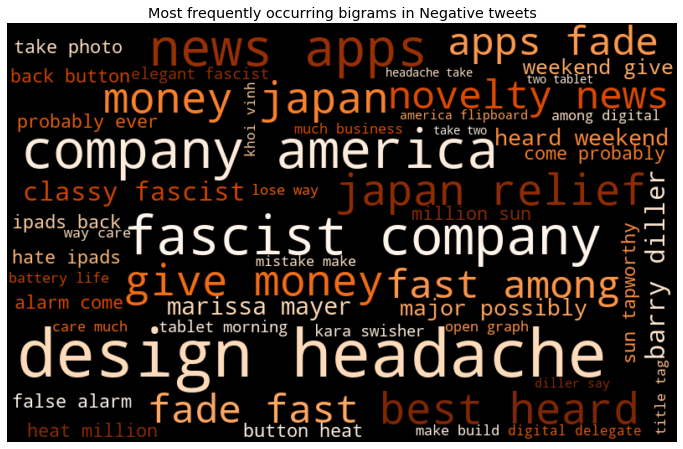

In [60]:
neg_words = get_top_n_bigram(neg_tweets['tweet'], 100)

words_dict = dict(neg_words)
wordCloud = WordCloud(width=800, height=500,colormap='Oranges',collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring bigrams in Negative tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

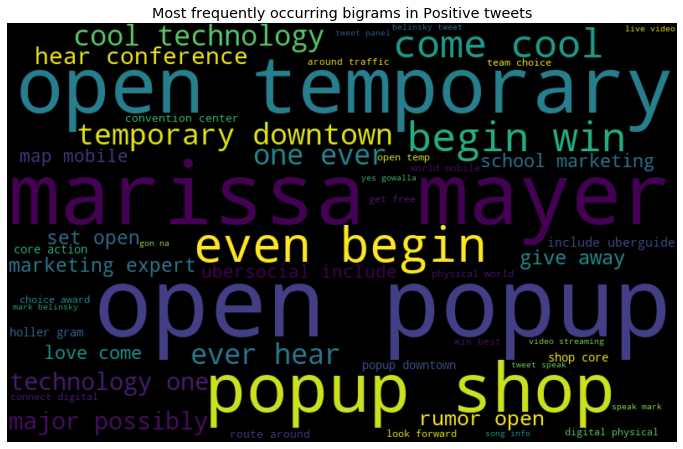

In [61]:
pos_tweets=df_train[df_train.sentiment == 2]
pos_words = get_top_n_bigram(pos_tweets['tweet'], 100)

words_dict = dict(pos_words)
wordCloud = WordCloud(width=800, height=500,collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring bigrams in Positive tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordCloud.to_file('wordcloud_bigram.jpg')

In [62]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



## EDA on Trigrams

In [63]:
from nltk.corpus import stopwords

In [64]:
pos_tweets=df_train[df_train.sentiment == 2]

In [65]:
custom_stop = ['link','quot','amp','ipad','iphone','google','apple','store','sxswrt','circles','rt','social','sxsw',
               'austin','android','app','new','will','line','launch','network','today','popup','party','ipad2']

In [66]:
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english') + custom_stop
    whitelist = ["not","no","n't"]
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 2] 
    return " ".join(clean_words)

In [67]:
pos_tweets.tweet = pos_tweets.tweet.apply(lambda x: remove_stopwords(x))

In [68]:
pos3_words = get_top_n_trigram(pos_tweets['tweet'], 100)

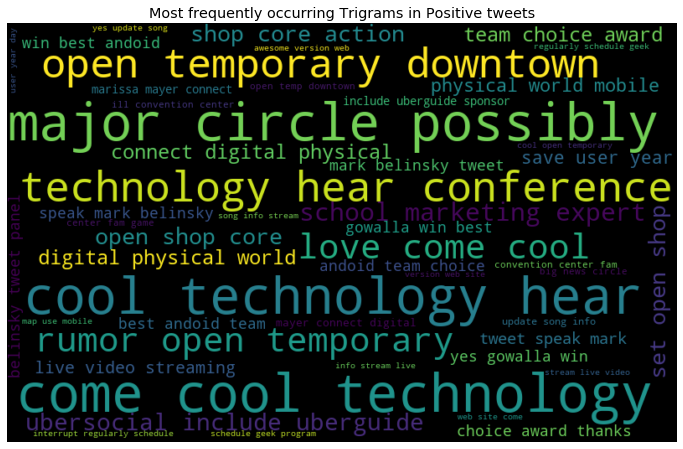

In [69]:
words_dict = dict(pos3_words)
wordCloud = WordCloud(width=800, height=500,collocations=False,max_words=50,random_state=21)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams in Positive tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Trigrams

In [70]:
neg_tweets=df_train[df_train.sentiment == 0]

In [71]:
neg_tweets.tweet = neg_tweets.tweet.apply(lambda x: remove_stopwords(x))

In [72]:
neg3_words = get_top_n_trigram(neg_tweets['tweet'], 100)

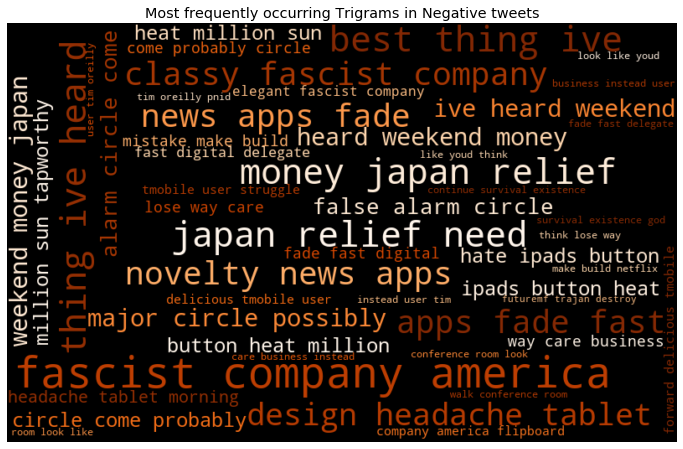

In [73]:
words_dict = dict(neg3_words)
wordCloud = WordCloud(width=800, height=500,collocations=False,max_words=50,random_state=21,colormap='Oranges_r')
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams in Negative tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [74]:
ipad_tweet = df_train[df_train['tweet'].str.contains('ipad')]

In [75]:
ipad_tweet_pos =ipad_tweet[ipad_tweet.sentiment == 2]
ipad_tweet_neg = ipad_tweet[ipad_tweet.sentiment == 0]
ipad_tweet_pos.tweet = ipad_tweet_pos.tweet.apply(lambda x: remove_stopwords(x))
ipad_tweet_neg.tweet = ipad_tweet_neg.tweet.apply(lambda x: remove_stopwords(x))

In [76]:
ipad_tweet_neg

tweet  sentiment  tweet_len  word_count
tweet_id                                                                                                                    
1178                     whole day wout laptop use thing miss ftp cloudapp fast type skype          0        115          22
2435      compose tweet acerbic cynical user phone crash dump apps twitterpower imthatgood          0        128          22
180                                    spent come youve already use wait couple city block          0        100          18
4454                                               sit floor behind guy fondle disturb way          0         88          17
3136                                            novelty news apps fade fast among delegate          0         59          10
...                                                                                    ...        ...        ...         ...
2591                         srsly love promo srsly hate excludes esp since insists disney          0         88          16
8649                                                            wow suck rebecca black fab          0         38           7
4572                                                                    internet blur fade          0         44           7
5315                rumor mill camera slightly thinner rare earth case still smudgy screen          0        119          18
268                course build temp texas understand concept corral cattle pickmeupanipad          0        120          19

[152 rows x 4 columns]

In [77]:
ipad_pos_3gram= get_top_n_trigram(ipad_tweet_pos['tweet'], 20)
ipad_neg_3gram = get_top_n_trigram(ipad_tweet_neg['tweet'], 20)

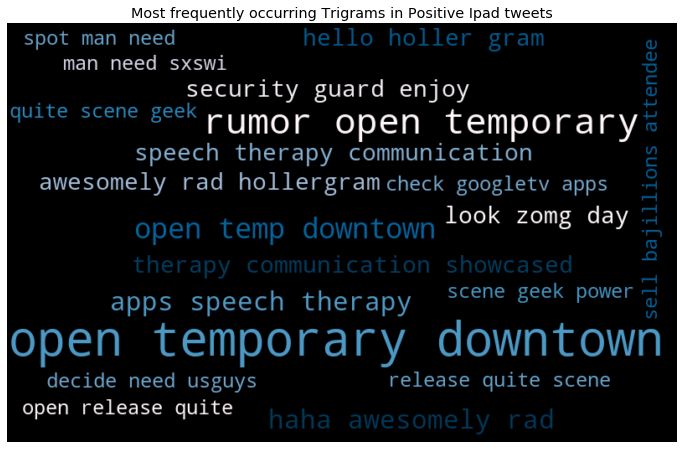

In [78]:
words_dict = dict(ipad_pos_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='PuBu_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams in Positive Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

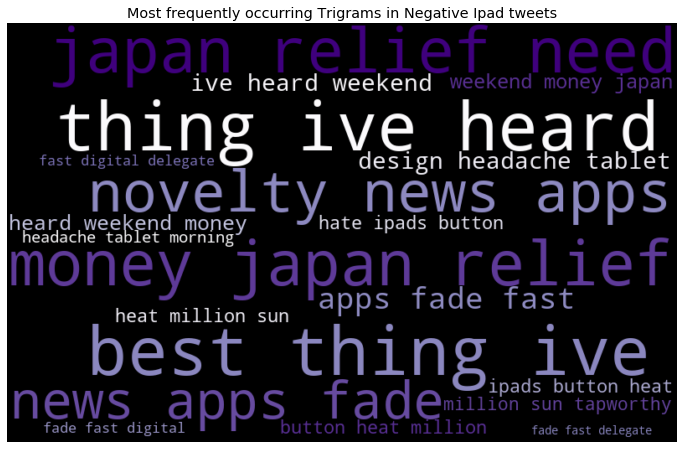

In [79]:
words_dict = dict(ipad_neg_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='Purples_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams in Negative Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [80]:
ipad_look = ipad_tweet[(ipad_tweet['tweet'].str.contains('look')) | (ipad_tweet['tweet'].str.contains('case'))]

In [81]:
stopwords_list = ['zomg','day','saw','look']

In [82]:
ipad_look['tweet']=ipad_look.tweet.apply(lambda x:nltk.word_tokenize(x))
ipad_look['tweet']=ipad_look['tweet'].apply(lambda row:[word for word in row if word not in stopwords_list])
ipad_look['tweet']=ipad_look['tweet'].apply(lambda x: ' '.join(x))

In [83]:
ipad_look_pos = ipad_look[ipad_look['sentiment']==2]
ipad_look_neg = ipad_look[ipad_look['sentiment']==0]


In [84]:
ipad_look_pos_3gram= get_top_n_trigram(ipad_look_pos['tweet'], 20)
ipad_look_neg_3gram = get_top_n_trigram(ipad_look_neg['tweet'], 20)

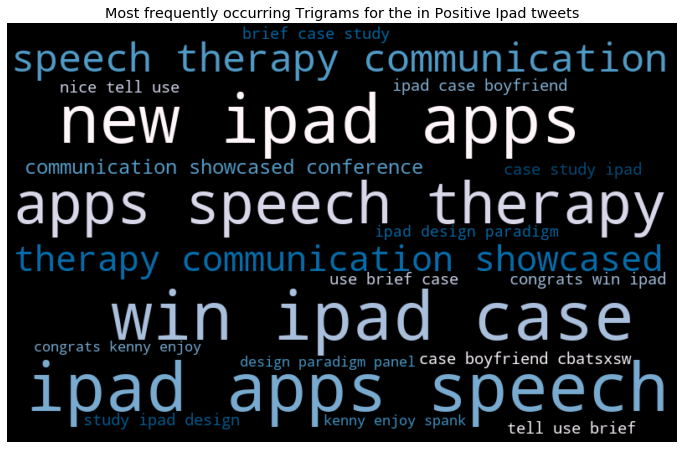

In [85]:
words_dict = dict(ipad_look_pos_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='PuBu_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams for the in Positive Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

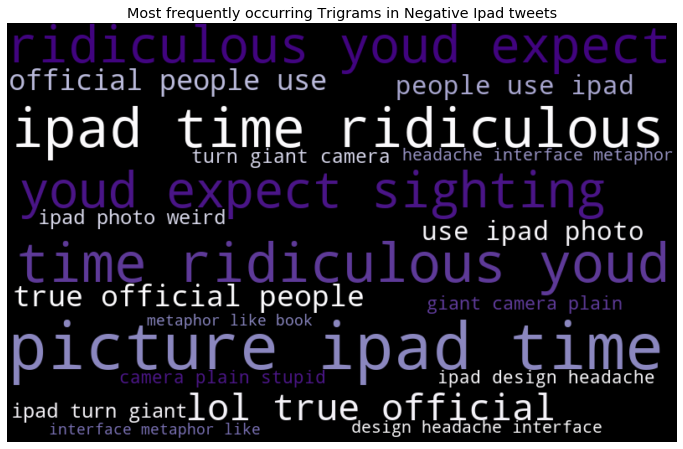

In [86]:
words_dict = dict(ipad_look_neg_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='Purples_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams in Negative Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [87]:
ipad_look_bigram_pos = get_top_n_bigram(ipad_look_pos['tweet'], 20)
ipad_look_bigram_neg = get_top_n_bigram(ipad_look_neg['tweet'], 20)

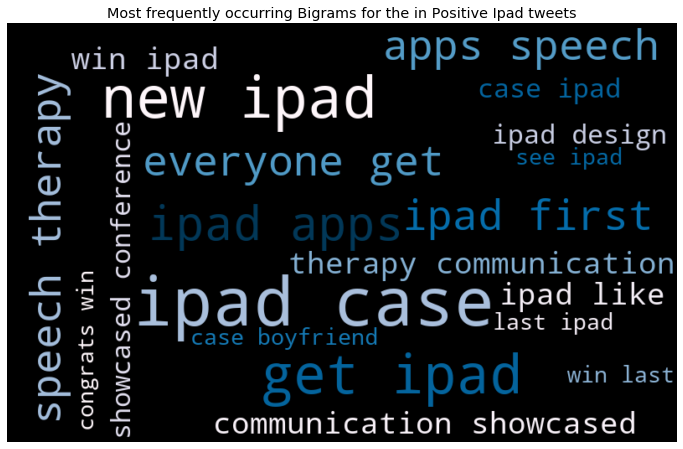

In [88]:
words_dict = dict(ipad_look_bigram_pos)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='PuBu_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Bigrams for the in Positive Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

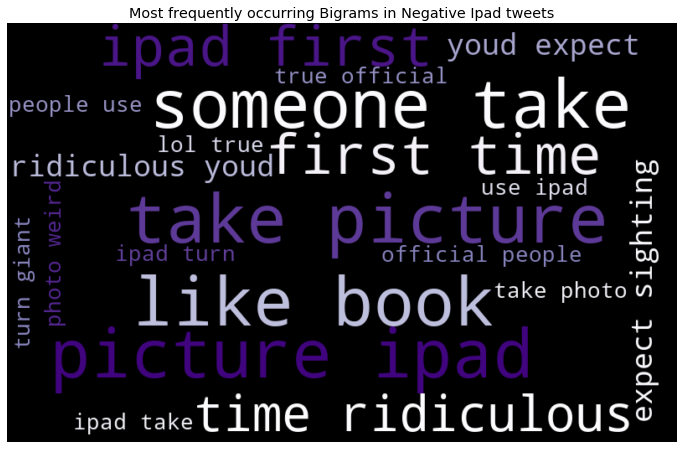

In [89]:
words_dict = dict(ipad_look_bigram_neg)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='Purples_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Bigrams in Negative Ipad tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [90]:
iphone_tweet = df_train[df_train['tweet'].str.contains('iphone')]

In [91]:
iphn_tweet_pos =iphone_tweet[iphone_tweet.sentiment == 2]
iphn_tweet_neg = iphone_tweet[iphone_tweet.sentiment == 0]
iphn_tweet_pos.tweet = iphn_tweet_pos.tweet.apply(lambda x: remove_stopwords(x))
iphn_tweet_neg.tweet = iphn_tweet_neg.tweet.apply(lambda x: remove_stopwords(x))

In [92]:
iphone_pos_3gram= get_top_n_trigram(iphn_tweet_pos['tweet'], 25)
iphone_neg_3gram = get_top_n_trigram(iphn_tweet_neg['tweet'], 25)

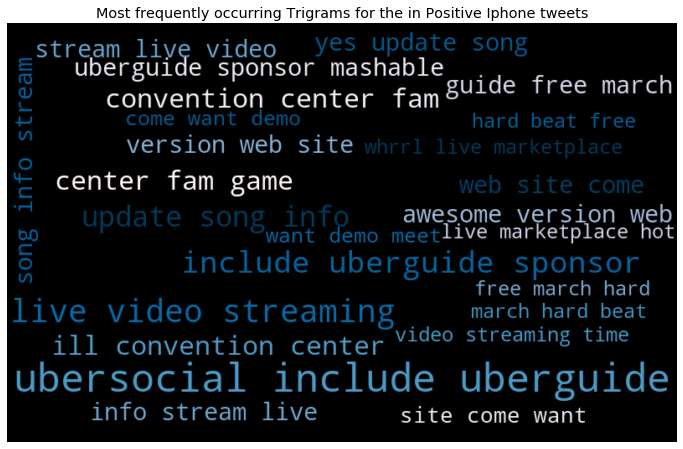

In [93]:
words_dict = dict(iphone_pos_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='PuBu_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams for the in Positive Iphone tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

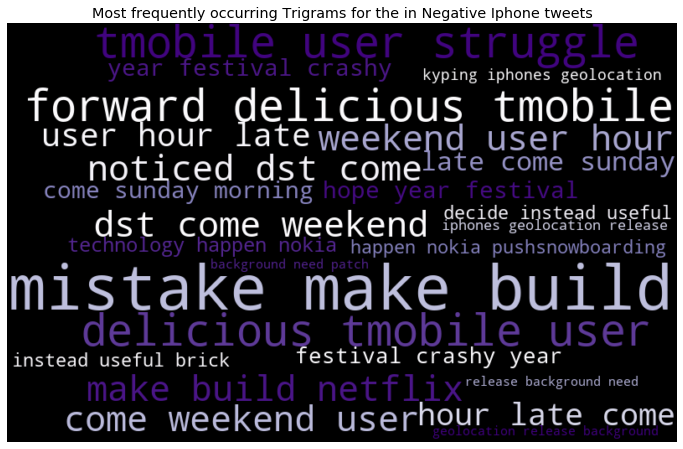

In [94]:
words_dict = dict(iphone_neg_3gram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='Purples_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams for the in Negative Iphone tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [95]:
iphone_pos_bigram= get_top_n_bigram(iphn_tweet_pos['tweet'], 20)
iphone_neg_bigram = get_top_n_bigram(iphn_tweet_neg['tweet'], 20)

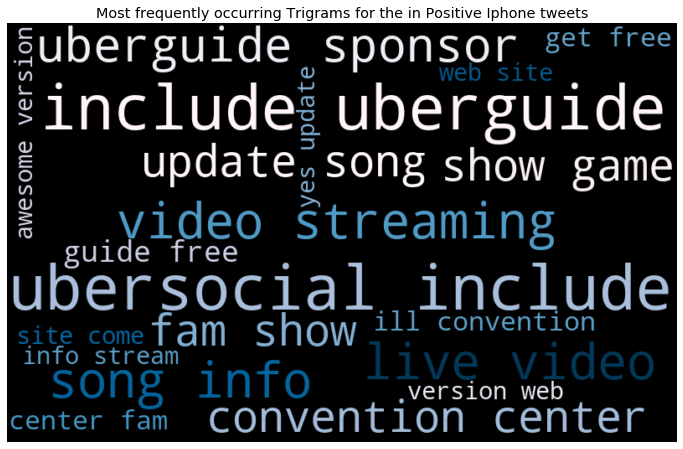

In [96]:
words_dict = dict(iphone_pos_bigram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='PuBu_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams for the in Positive Iphone tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

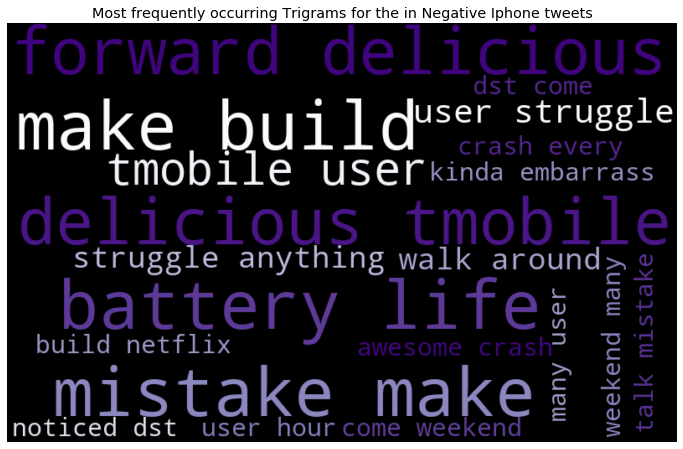

In [97]:
words_dict = dict(iphone_neg_bigram)
wordCloud = WordCloud(width=800, height=500,max_words=50,random_state=21,colormap='Purples_r',max_font_size=80)
wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(12,12))
plt.title('Most frequently occurring Trigrams for the in Negative Iphone tweets')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [98]:
iphone_tweet_bar = iphone_tweet[(iphone_tweet['sentiment'] == 0) | (iphone_tweet['sentiment'] == 2)]

In [99]:
iphone_tweet_bar.shape

(574, 4)

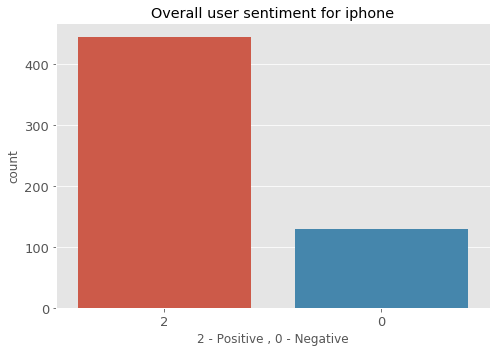

In [100]:
plt.figure(figsize=(7,5))
sns.countplot(iphone_tweet_bar['sentiment'],order = iphone_tweet_bar['sentiment'].value_counts().index)
plt.title('Overall user sentiment for iphone')
plt.xlabel("2 - Positive , 0 - Negative")
plt.tight_layout()
plt.show()

In [101]:
ipad_tweet_bar = ipad_tweet[(ipad_tweet['sentiment'] == 0) | (ipad_tweet['sentiment'] == 2)]

In [102]:
ipad_tweet_bar.shape

(1099, 4)

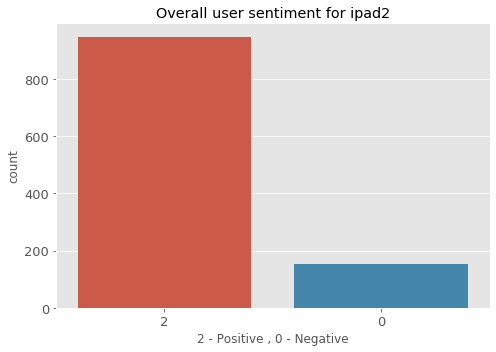

In [103]:
plt.figure(figsize=(7,5))
sns.countplot(ipad_tweet_bar['sentiment'],order = ipad_tweet_bar['sentiment'].value_counts().index)
plt.title('Overall user sentiment for ipad2')
plt.xlabel("2 - Positive , 0 - Negative")
plt.tight_layout()
plt.show()